## Import libraries required

In [1]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils.io_utils import HDF5Matrix

%matplotlib inline

/home/megha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the data in HDF5 matrix format

### Training data

Q. How do you test whether the current dataset is loaded? 

A: Print the size to test whether the right dataset is loaded

In [6]:
base_path = os.path.join('..','data')
train_h5_path = os.path.join(base_path, 'food_c101_n10099_r64x64x3.h5')


In [7]:
X_train = HDF5Matrix(train_h5_path, 'images')[:]
y_train = HDF5Matrix(train_h5_path, 'category')[:]
y_train_cat = np.argmax(y_train,-1)
print('In Data',X_train.shape,'=>', y_train.shape, '=>', y_train_cat.shape)

In Data (10099, 64, 64, 3) => (10099, 101) => (10099,)


### Test data

In [8]:
test_h5_path = os.path.join(base_path, 'food_test_c101_n1000_r64x64x3.h5')

In [9]:
X_test = HDF5Matrix(test_h5_path, 'images')[:]
y_test = HDF5Matrix(test_h5_path, 'category')[:]
y_test_cat = np.argmax(y_test,-1)
print('In Data',X_test.shape,'=>', y_test.shape, '=>', y_test_cat.shape)

In Data (1000, 64, 64, 3) => (1000, 101) => (1000,)


### Visualize data

#### Hint: Arrange image and labels in a grid

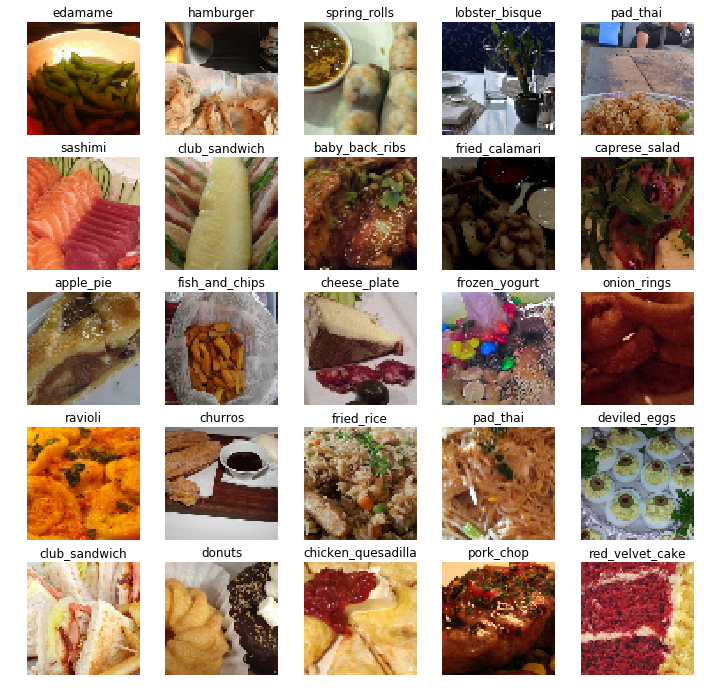

In [10]:
sample_imgs = 50
with h5py.File(train_h5_path, 'r') as n_file:
    total_imgs = n_file['images'].shape[0]
    read_idxs = slice(0,sample_imgs)
    im_data = n_file['images'][read_idxs]
    im_label = n_file['category'].value[read_idxs]
    label_names = [x.decode() for x in n_file['category_names'].value]
fig, m_ax = plt.subplots(5, 5, figsize = (12, 12))
for c_ax, c_label, c_img in zip(m_ax.flatten(), im_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title(label_names[np.argmax(c_label)])